## Read the Data

## Model no 31

Target:
+ life_ladder  

Features:
+ log_gdp_per_capita
+ social_support
+ healthy_life_expectancy_at_birth
+ freedom_to_make_life_choices
+ perceptions_of_corruption
+ positive_affect
+ eys_year
+ mys_year

In [139]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler, MinMaxScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor, AdaBoostRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_absolute_percentage_error 

In [140]:
df= pd.read_csv('../data/life_ladder_gdi_eys_mys.txt', sep = "\s*,\s*")

/var/folders/xp/szpgjcc16693xmv1q4_gmwgr0000gn/T/ipykernel_41398/496302867.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df= pd.read_csv('../data/life_ladder_gdi_eys_mys.txt', sep = "\s*,\s*")


In [141]:
df.head()

,country_name,year,life_ladder,log_gdp_per_capita,social_support,healthy_life_expectancy_at_birth,freedom_to_make_life_choices,perceptions_of_corruption,positive_affect,negative_affect,gdi_year,eys_year,mys_year
0,Afghanistan,2008,3.724,7.350,0.451,50.5,0.718,0.882,0.414,0.258,0.682,8.630830,1.742754
1,Afghanistan,2009,4.402,7.509,0.552,50.8,0.679,0.850,0.481,0.237,0.685,8.888430,1.816490
2,Afghanistan,2010,4.758,7.614,0.539,51.1,0.600,0.707,0.517,0.275,0.684,9.180810,1.890226
3,Afghanistan,2011,3.832,7.581,0.521,51.4,0.496,0.731,0.480,0.267,0.671,9.473190,1.937043
4,Afghanistan,2012,3.783,7.661,0.521,51.7,0.531,0.776,0.614,0.268,0.634,9.803687,1.983860


In [142]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1993 entries, 0 to 1992
Data columns (total 13 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   country_name                      1993 non-null   object 
 1   year                              1993 non-null   int64  
 2   life_ladder                       1993 non-null   float64
 3   log_gdp_per_capita                1993 non-null   float64
 4   social_support                    1993 non-null   float64
 5   healthy_life_expectancy_at_birth  1993 non-null   float64
 6   freedom_to_make_life_choices      1993 non-null   float64
 7   perceptions_of_corruption         1993 non-null   float64
 8   positive_affect                   1993 non-null   float64
 9   negative_affect                   1993 non-null   float64
 10  gdi_year                          1908 non-null   float64
 11  eys_year                          1946 non-null   float64
 12  mys_ye

In [143]:
type(df)

pandas.core.frame.DataFrame

In [144]:
df.columns

Index(['country_name', 'year', 'life_ladder', 'log_gdp_per_capita',
       'social_support', 'healthy_life_expectancy_at_birth',
       'freedom_to_make_life_choices', 'perceptions_of_corruption',
       'positive_affect', 'negative_affect', 'gdi_year', 'eys_year',
       'mys_year'],
      dtype='object')

In [145]:
# drop Nan in column eys_year before modeling
df = df.dropna(subset = ['eys_year']) 

In [146]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1946 entries, 0 to 1992
Data columns (total 13 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   country_name                      1946 non-null   object 
 1   year                              1946 non-null   int64  
 2   life_ladder                       1946 non-null   float64
 3   log_gdp_per_capita                1946 non-null   float64
 4   social_support                    1946 non-null   float64
 5   healthy_life_expectancy_at_birth  1946 non-null   float64
 6   freedom_to_make_life_choices      1946 non-null   float64
 7   perceptions_of_corruption         1946 non-null   float64
 8   positive_affect                   1946 non-null   float64
 9   negative_affect                   1946 non-null   float64
 10  gdi_year                          1908 non-null   float64
 11  eys_year                          1946 non-null   float64
 12  mys_year   

## Modeling

In [147]:
model_name = 'model_31'

In [148]:
features = df.columns.tolist()
features.remove('country_name')
features.remove('year')
features.remove('life_ladder')
features.remove('gdi_year')
features.remove('negative_affect')
features.remove('perceptions_of_corruption')

X = df[features]
y = df['life_ladder']

In [149]:
X.columns

Index(['log_gdp_per_capita', 'social_support',
       'healthy_life_expectancy_at_birth', 'freedom_to_make_life_choices',
       'positive_affect', 'eys_year', 'mys_year'],
      dtype='object')

In [150]:
print(X.shape, y.shape)

(1946, 7) (1946,)


#### Train-Test Split

In [151]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

In [152]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(1362, 7) (584, 7) (1362,) (584,)


In [153]:
X_train.describe()

,log_gdp_per_capita,social_support,healthy_life_expectancy_at_birth,freedom_to_make_life_choices,positive_affect,eys_year,mys_year
count,1362.000000,1362.000000,1362.000000,1362.000000,1362.000000,1362.000000,1362.000000
mean,9.371276,0.809358,63.363203,0.750659,0.656167,13.534738,8.753089
std,1.145988,0.121519,6.935323,0.139733,0.106386,3.144741,3.367536
min,5.527000,0.290000,6.720000,0.304000,0.263000,3.674470,0.976930
25%,8.492750,0.741000,59.105000,0.659000,0.573000,11.321405,6.310461
50%,9.505500,0.836000,65.100000,0.773000,0.670000,13.866865,9.116028
75%,10.325750,0.906000,68.715000,0.863000,0.743000,15.796950,11.631173
max,11.660000,0.987000,74.475000,0.975000,0.876000,23.247681,14.255940


#### Scaling with StandartScaler and MinMaxScaler  
we will use the scaled data for KNN and Linear Regression

In [154]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [155]:
normalizer = MinMaxScaler()
X_train_normalized = normalizer.fit_transform(X_train)
X_test_normalized = normalizer.transform(X_test)

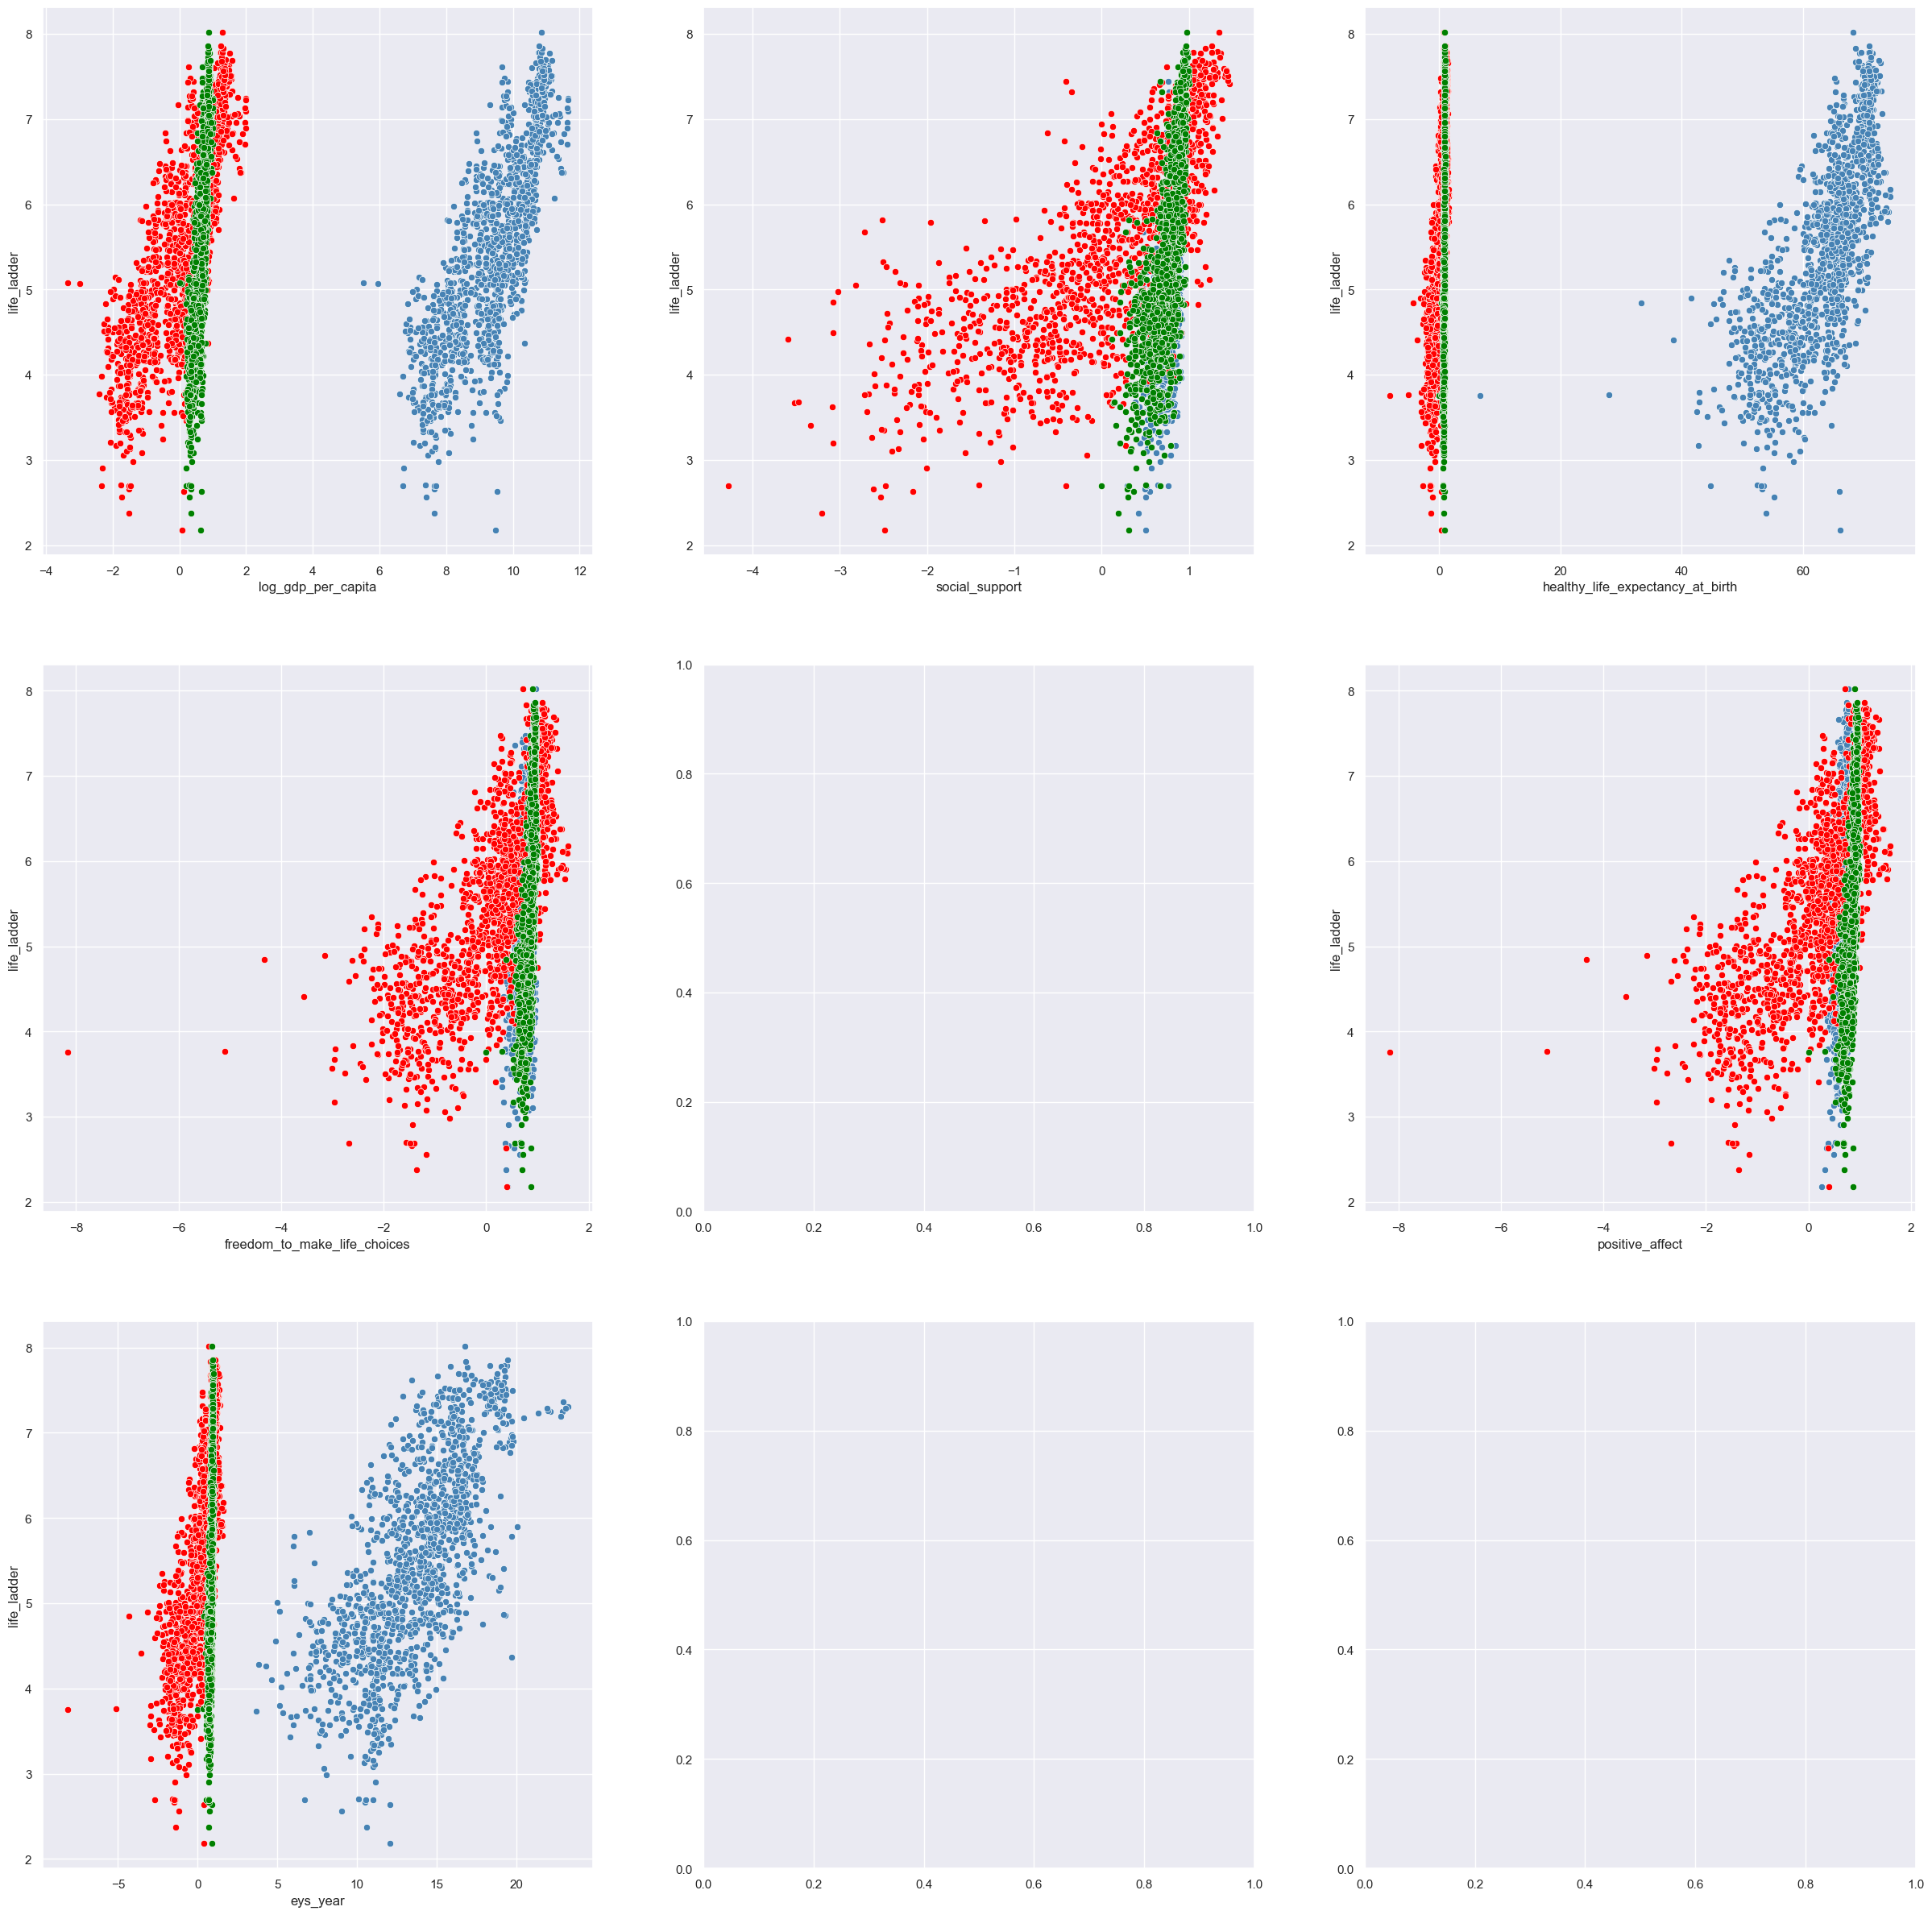

In [156]:
fig,ax = plt.subplots(3,3,figsize=(30,30))
sns.scatterplot(ax= ax[0][0], x = X_train.log_gdp_per_capita, y = y_train, color = 'steelblue')
sns.scatterplot(ax= ax[0][0], x = X_train_scaled[:,0], y = y_train, color = 'red')
sns.scatterplot(ax= ax[0][0], x = X_train_normalized[:,0], y = y_train, color = 'green')
sns.scatterplot(ax= ax[0][1], x = X_train.social_support, y = y_train, color = 'steelblue')
sns.scatterplot(ax= ax[0][1], x = X_train_scaled[:,1], y = y_train, color = 'red')
sns.scatterplot(ax= ax[0][1], x = X_train_normalized[:,1], y = y_train, color = 'green')
sns.scatterplot(ax= ax[0][2], x = X_train.healthy_life_expectancy_at_birth, y = y_train, color = 'steelblue')
sns.scatterplot(ax= ax[0][2], x = X_train_scaled[:,2], y = y_train, color = 'red')
sns.scatterplot(ax= ax[0][2], x = X_train_normalized[:,2], y = y_train, color = 'green')
sns.scatterplot(ax= ax[1][0], x = X_train.freedom_to_make_life_choices, y = y_train, color = 'steelblue')
sns.scatterplot(ax= ax[1][0], x = X_train_scaled[:,2], y = y_train, color = 'red')
sns.scatterplot(ax= ax[1][0], x = X_train_normalized[:,2], y = y_train, color = 'green')
#sns.scatterplot(ax= ax[1][1], x = X_train.perceptions_of_corruption, y = y_train, color = 'steelblue')
#sns.scatterplot(ax= ax[1][1], x = X_train_scaled[:,2], y = y_train, color = 'red')
#sns.scatterplot(ax= ax[1][1], x = X_train_normalized[:,2], y = y_train, color = 'green');
sns.scatterplot(ax= ax[1][2], x = X_train.positive_affect, y = y_train, color = 'steelblue')
sns.scatterplot(ax= ax[1][2], x = X_train_scaled[:,2], y = y_train, color = 'red')
sns.scatterplot(ax= ax[1][2], x = X_train_normalized[:,2], y = y_train, color = 'green');
sns.scatterplot(ax= ax[2][0], x = X_train.eys_year, y = y_train, color = 'steelblue')
sns.scatterplot(ax= ax[2][0], x = X_train_scaled[:,2], y = y_train, color = 'red')
sns.scatterplot(ax= ax[2][0], x = X_train_normalized[:,2], y = y_train, color = 'green');

In [157]:
def adjusted_r2(y,y_pred, X):
    adjusted_r2 = 1 - ((1 - r2_score(y, y_pred)) * (len(X) - 1) / (len(X) - X.shape[1] - 1))
    return adjusted_r2 

### Feature selection
**1. ExtraTreesRegressor**

In [158]:
et_clf = ExtraTreesRegressor(n_estimators=150)
et_clf = et_clf.fit(X_train, y_train)
feature_importances = et_clf.feature_importances_
fi_lst = []
for idx, i in enumerate(X_train.columns.to_list()):
    fi_lst.append({'feature_name': i, 'feature_importance': feature_importances[idx]})
    #print(i, feature_importances[idx])
feature_df = pd.DataFrame(fi_lst)
feature_df.sort_values('feature_importance', ascending=False)

,feature_name,feature_importance
0,log_gdp_per_capita,0.313493
2,healthy_life_expectancy_at_birth,0.177693
1,social_support,0.172887
4,positive_affect,0.098865
6,mys_year,0.094860
5,eys_year,0.084530
3,freedom_to_make_life_choices,0.057672


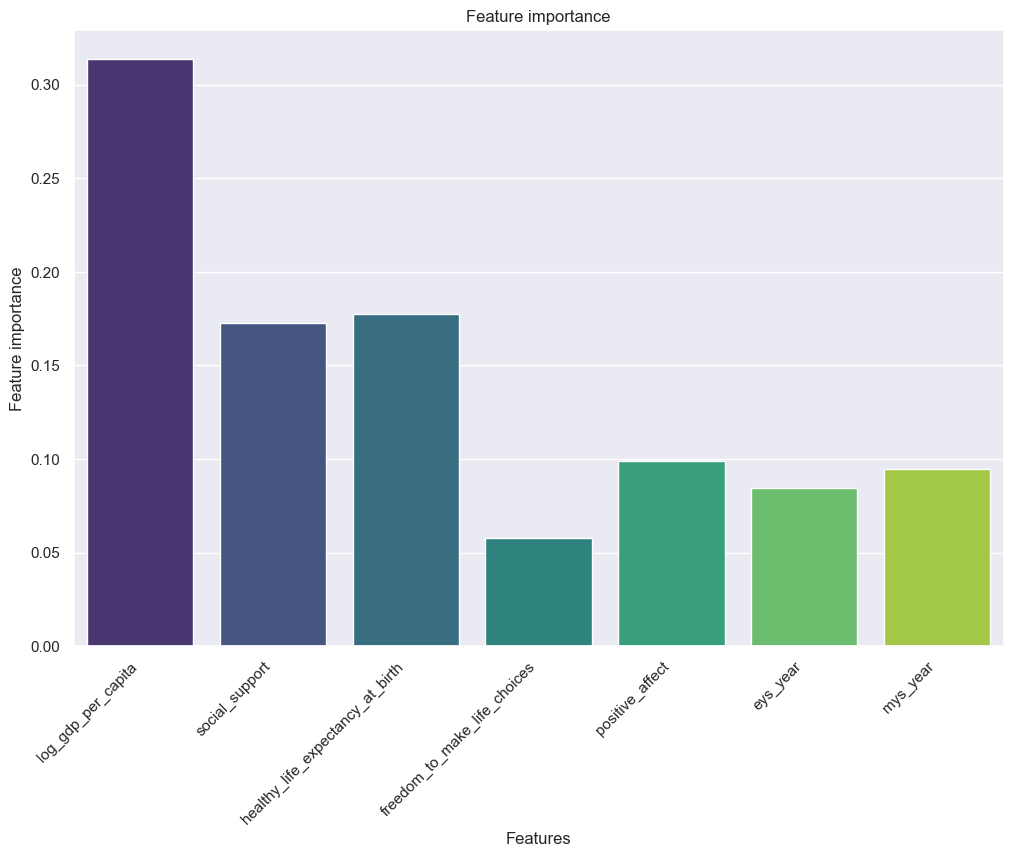

In [159]:
plt.figure(figsize=(12, 8))
sns.barplot(x=feature_df['feature_name'],
            y=feature_df['feature_importance'].sort_values(ascending=False),
            palette="viridis")
plt.title('Feature importance')
plt.xlabel('Features')
plt.ylabel('Feature importance')
plt.xticks(rotation=45, ha="right")
plt.show()

**2. SelectKBest**

In [160]:
# Import SelectKBest, f_regression (score function for regression)
from sklearn.feature_selection import SelectKBest, f_regression

# Create the object for SelectKBest and fit and transform the regression data
fs=SelectKBest(score_func=f_regression, k='all')
fs.fit(X_train, y_train)

SelectKBest(k='all', score_func=<function f_regression at 0x287cd9260>)

Feature 0: 2257.051375
Feature 1: 1537.740723
Feature 2: 1507.703726
Feature 3: 498.243998
Feature 4: 459.415990
Feature 5: 1345.135897
Feature 6: 1027.797099


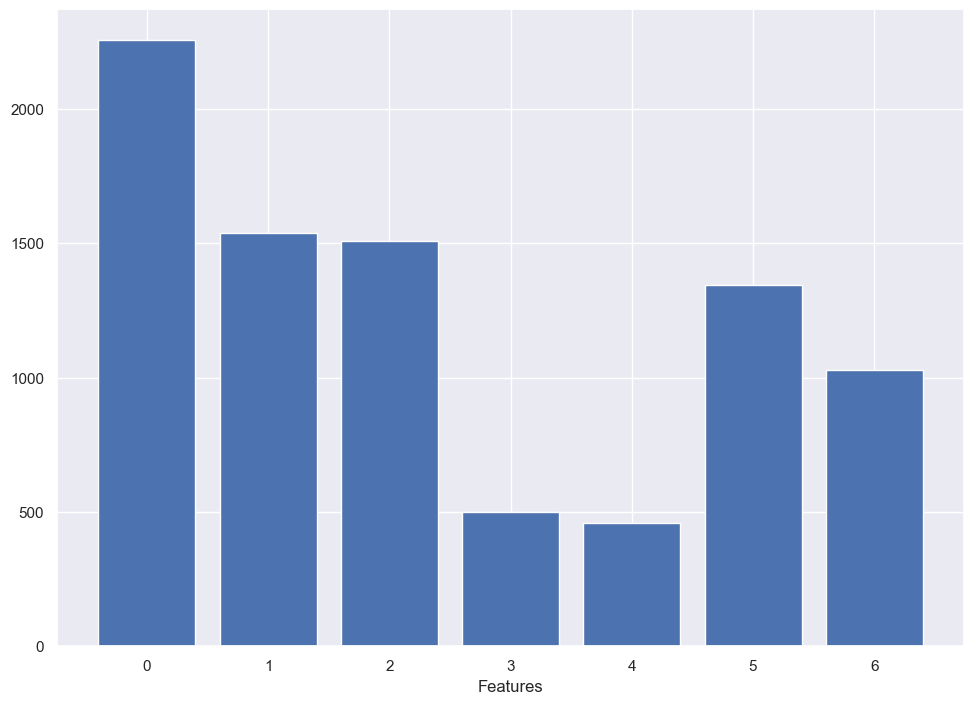

In [161]:
# what are scores for the features
for i in range(len(fs.scores_)):
 print('Feature %d: %f' % (i, fs.scores_[i]))
# plot the scores
plt.bar([i for i in range(len(fs.scores_))], fs.scores_)
plt.xlabel('Features')
plt.show()

--> gdp_per_capita, social_support, healthy_life, eys_year, mys_year

**3. mutual_info_regression**

In [162]:
#using mutual_info_classif for classification problem MI
from sklearn.feature_selection import mutual_info_regression

mi_scores = mutual_info_regression(X_train, y_train)
mi_scores = pd.Series(mi_scores, name="MI Scores", index=X_train.columns)
mi_scores = mi_scores.sort_values(ascending=False)

mi_scores # show a few features with their MI scores

log_gdp_per_capita                  0.673183
healthy_life_expectancy_at_birth    0.507377
eys_year                            0.485390
social_support                      0.476473
mys_year                            0.388141
freedom_to_make_life_choices        0.294968
positive_affect                     0.229680
Name: MI Scores, dtype: float64

### Linear Regression

In [163]:
lin_reg_error_lst = []

for i in range(1,4):
    polynomial_features = PolynomialFeatures(degree=i, include_bias=False)
    x_poly_train = polynomial_features.fit_transform(X_train_scaled)
    x_poly_test = polynomial_features.transform(X_test_scaled)

    lin_reg_poly = LinearRegression()
    lin_reg_poly.fit(x_poly_train,y_train)

    y_pred_poly_test = lin_reg_poly.predict(x_poly_test)
    y_pred_poly_train = lin_reg_poly.predict(x_poly_train)

    rmse_test = mean_squared_error(y_test, y_pred_poly_test, squared=False).round(3)
    r2_test = adjusted_r2(y_test, y_pred_poly_test, X_test_scaled).round(3)
    rmse_train = mean_squared_error(y_train, y_pred_poly_train, squared=False).round(3)
    r2_train = adjusted_r2(y_train, y_pred_poly_train, X_train_scaled).round(3)
    
    mae_test = mean_absolute_error(y_test, y_pred_poly_test).round(3)
    mape_test = mean_absolute_percentage_error(y_test, y_pred_poly_test).round(3)
    mae_train = mean_absolute_error(y_train, y_pred_poly_train).round(3)
    mape_train = mean_absolute_percentage_error(y_train, y_pred_poly_train).round(3)
    
    delta_rmse = abs(rmse_train - rmse_test)
    delta_r2 = abs(r2_train - r2_test)
    delta_mae = abs(mae_train - mae_test)
    
    model_descrip = model_name + '_lin_reg_' + str(i)
    lin_reg_error_lst.append({'model_name': model_descrip, 
                      'train_rmse': rmse_train, 
                      'train_r2':r2_train, 
                      'train_mae': mae_train, 
                      'train_mape':mape_train,
                      'test_rmse': rmse_test, 
                      'test_r2':r2_test,
                      'test_mae': mae_test, 
                      'test_mape':mape_test,
                      'delta_RMSE':delta_rmse,
                      'delta_MAE':delta_mae,
                      'delta_R2':delta_r2})

lin_reg_error_df = pd.DataFrame(lin_reg_error_lst)
lin_reg_error_df.sort_values(by = ['delta_R2', 'test_r2'], ascending=[True, False])


,model_name,train_rmse,train_r2,train_mae,train_mape,test_rmse,test_r2,test_mae,test_mape,delta_RMSE,delta_MAE,delta_R2
1,model_31_lin_reg_2,0.498,0.810,0.386,0.077,0.481,0.815,0.379,0.074,0.017,0.007,0.005
0,model_31_lin_reg_1,0.555,0.763,0.427,0.085,0.521,0.782,0.409,0.080,0.034,0.018,0.019
2,model_31_lin_reg_3,0.446,0.847,0.348,0.069,0.500,0.799,0.374,0.074,0.054,0.026,0.048


/var/folders/xp/szpgjcc16693xmv1q4_gmwgr0000gn/T/ipykernel_41398/1933425063.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  g.set_xticklabels(g.get_xticklabels(), rotation=90)


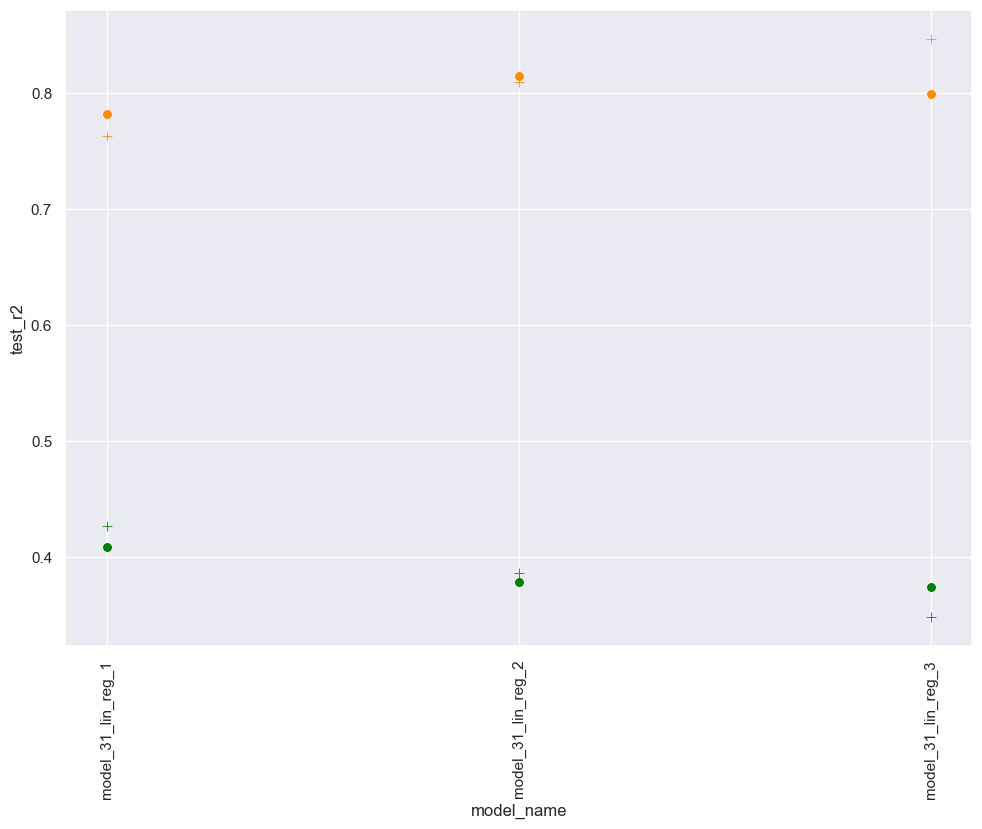

In [164]:
g = sns.scatterplot(data = lin_reg_error_df, x = 'model_name', y = 'test_r2', color = 'darkorange', s = 50)
g = sns.scatterplot(data = lin_reg_error_df, x = 'model_name', y = 'test_mae', color = 'green', s = 50)
g = sns.scatterplot(data = lin_reg_error_df, x = 'model_name', y = 'train_r2', marker='+', color = 'darkorange', s = 50)
g = sns.scatterplot(data = lin_reg_error_df, x = 'model_name', y = 'train_mae', marker='+', color = 'green', s = 50)
g.set_xticklabels(g.get_xticklabels(), rotation=90)
plt.show();

cross validation for scaled data

In [165]:
lin_reg_cv_score_lst = []
count = 0
for pre_data in [[X_train, X_test], [X_train_scaled, X_test_scaled], [X_train_normalized, X_test_normalized]]:
    lin_reg_scaled = LinearRegression()
    cv_scores = cross_val_score(lin_reg_scaled, pre_data[0], y_train, cv=5, n_jobs=-1)

    model_descrip = model_name + '_lin_reg_scaler_'  + str(count)
    lin_reg_cv_score_lst.append({'model_name': model_descrip,
                          'cv_score': round(cv_scores.mean(), 3)})
    
    count += 1

lin_reg_cv_score_df = pd.DataFrame(lin_reg_cv_score_lst)
lin_reg_cv_score_df.sort_values(by = 'cv_score', ascending= False)

,model_name,cv_score
0,model_31_lin_reg_scaler_0,0.758
1,model_31_lin_reg_scaler_1,0.758
2,model_31_lin_reg_scaler_2,0.758


part df with the best models:

In [166]:
part_lin_reg = lin_reg_error_df.sort_values(by =['test_mae', 'delta_MAE']).iloc[:3]
part_lin_reg

,model_name,train_rmse,train_r2,train_mae,train_mape,test_rmse,test_r2,test_mae,test_mape,delta_RMSE,delta_MAE,delta_R2
2,model_31_lin_reg_3,0.446,0.847,0.348,0.069,0.500,0.799,0.374,0.074,0.054,0.026,0.048
1,model_31_lin_reg_2,0.498,0.810,0.386,0.077,0.481,0.815,0.379,0.074,0.017,0.007,0.005
0,model_31_lin_reg_1,0.555,0.763,0.427,0.085,0.521,0.782,0.409,0.080,0.034,0.018,0.019


### KNN

In [167]:
knn_error_lst = []
k_list = np.arange(13, 34, 5)
metrics_list = ["manhattan", "euclidean", "minkowski"]
for neigh in k_list:
    for metr in metrics_list:
#for metr in range(1,4):
    #for neigh in np.arange(2,52,5): 
        knn = KNeighborsRegressor(n_neighbors=neigh, metric=metr, weights='uniform')
        knn.fit(X_train_scaled, y_train)

        y_pred_knn_test = knn.predict(X_test_scaled)
        y_pred_knn_train = knn.predict(X_train_scaled)
        rmse_test = mean_squared_error(y_test, y_pred_knn_test, squared=False).round(3)
        r2_test = adjusted_r2(y_test, y_pred_knn_test, X_test_scaled).round(3)
        rmse_train = mean_squared_error(y_train, y_pred_knn_train, squared=False).round(3)
        r2_train = adjusted_r2(y_train, y_pred_knn_train, X_train_scaled).round(3)
        
        mae_test = mean_absolute_error(y_test, y_pred_knn_test).round(3)
        mape_test = mean_absolute_percentage_error(y_test, y_pred_knn_test).round(3)
        mae_train = mean_absolute_error(y_train, y_pred_knn_train).round(3)
        mape_train = mean_absolute_percentage_error(y_train, y_pred_knn_train).round(3)
        
        delta_rmse = abs(rmse_train - rmse_test)
        delta_r2 = abs(r2_train - r2_test)
        delta_mae = abs(mae_train - mae_test)

        model_descrip = model_name + '_knn_' + str(metr) + '_' + str(neigh)
        knn_error_lst.append({'model_name': model_descrip, 
                      'train_rmse': rmse_train, 
                      'train_r2':r2_train, 
                      'train_mae': mae_train, 
                      'train_mape':mape_train,
                      'test_rmse': rmse_test, 
                      'test_r2':r2_test,
                      'test_mae': mae_test, 
                      'test_mape':mape_test,
                      'delta_RMSE':delta_rmse,
                      'delta_MAE':delta_mae,
                      'delta_R2':delta_r2})
        
knn_error_df = pd.DataFrame(knn_error_lst)
#knn_error_df.sort_values(by = ['delta_R2', 'test_r2'], ascending=[True, False])
#knn_error_df.sort_values(by = ['test_r2', 'delta_R2'], ascending=[False, True])
knn_error_df.sort_values(by = ['delta_MAE', 'test_mae'], ascending=[True, True])
#knn_error_df.sort_values(by = ['delta_MAE', 'test_mae'], ascending=[True, True])

,model_name,train_rmse,train_r2,train_mae,train_mape,test_rmse,test_r2,test_mae,test_mape,delta_RMSE,delta_MAE,delta_R2
7,model_31_knn_euclidean_23,0.472,0.829,0.361,0.073,0.462,0.829,0.361,0.072,0.010,0.000,0.000
8,model_31_knn_minkowski_23,0.472,0.829,0.361,0.073,0.462,0.829,0.361,0.072,0.010,0.000,0.000
10,model_31_knn_euclidean_28,0.484,0.820,0.369,0.075,0.470,0.823,0.369,0.074,0.014,0.000,0.003
11,model_31_knn_minkowski_28,0.484,0.820,0.369,0.075,0.470,0.823,0.369,0.074,0.014,0.000,0.003
13,model_31_knn_euclidean_33,0.491,0.815,0.375,0.076,0.477,0.818,0.375,0.075,0.014,0.000,0.003
14,model_31_knn_minkowski_33,0.491,0.815,0.375,0.076,0.477,0.818,0.375,0.075,0.014,0.000,0.003
3,model_31_knn_manhattan_18,0.444,0.849,0.339,0.069,0.436,0.848,0.341,0.068,0.008,0.002,0.001
4,model_31_knn_euclidean_18,0.455,0.841,0.347,0.071,0.451,0.837,0.351,0.070,0.004,0.004,0.004
5,model_31_knn_minkowski_18,0.455,0.841,0.347,0.071,0.451,0.837,0.351,0.070,0.004,0.004,0.004
6,model_31_knn_manhattan_23,0.464,0.835,0.355,0.072,0.448,0.839,0.349,0.070,0.016,0.006,0.004


/var/folders/xp/szpgjcc16693xmv1q4_gmwgr0000gn/T/ipykernel_41398/1622020098.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  g.set_xticklabels(g.get_xticklabels(), rotation=90)


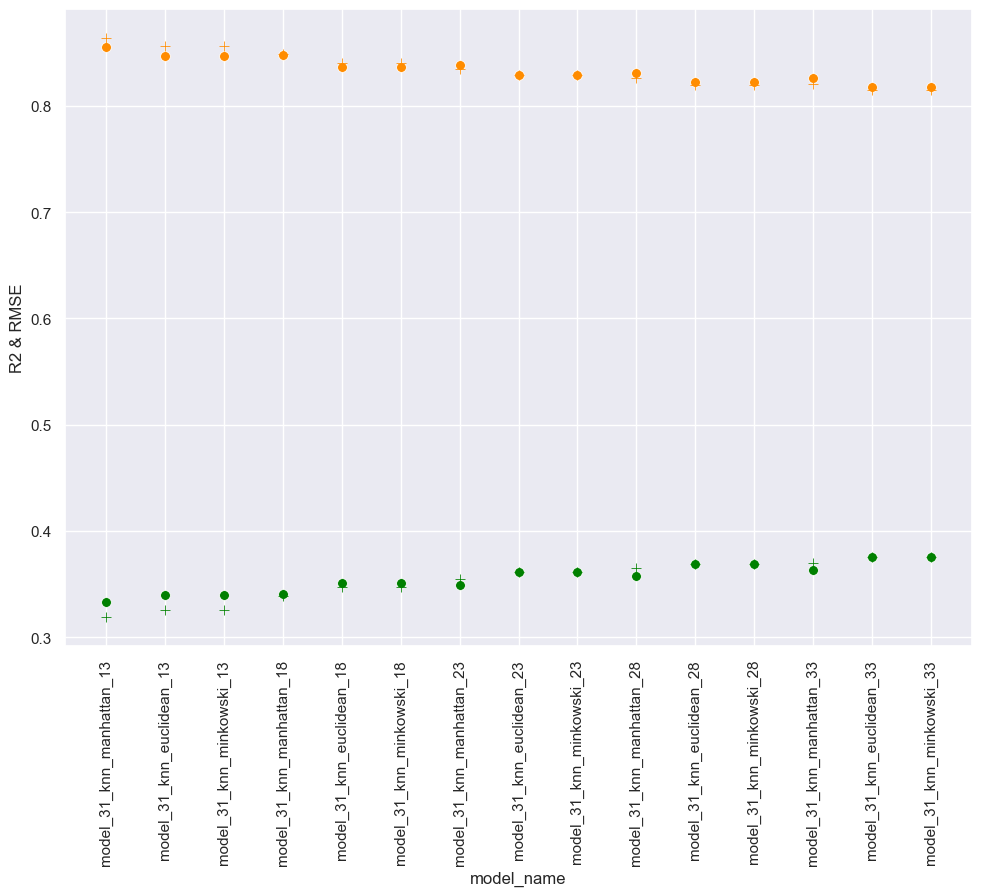

In [168]:
g=sns.scatterplot(data = knn_error_df, x = 'model_name', y = 'test_r2', color = 'darkorange', s = 50)
g=sns.scatterplot(data = knn_error_df, x = 'model_name', y = 'test_mae', color = 'green', s = 50)
g=sns.scatterplot(data = knn_error_df, x = 'model_name', y = 'train_r2', marker='+', color = 'darkorange', s = 50)
g=sns.scatterplot(data = knn_error_df, x = 'model_name', y = 'train_mae', marker='+', color = 'green', s = 50)
g.set_xticklabels(g.get_xticklabels(), rotation=90)
g.set(ylabel='R2 & RMSE')
plt.show();

In [169]:
#part_knn = knn_error_df.sort_values(by = ['delta_R2', 'test_r2'], ascending=[True, False]).iloc[:6]
part_knn = knn_error_df.sort_values(by = ['test_mae', 'delta_MAE'], ascending=[True, True]).iloc[:6]
part_knn

,model_name,train_rmse,train_r2,train_mae,train_mape,test_rmse,test_r2,test_mae,test_mape,delta_RMSE,delta_MAE,delta_R2
0,model_31_knn_manhattan_13,0.422,0.864,0.319,0.065,0.424,0.856,0.333,0.067,0.002,0.014,0.008
1,model_31_knn_euclidean_13,0.431,0.857,0.326,0.067,0.437,0.847,0.340,0.068,0.006,0.014,0.010
2,model_31_knn_minkowski_13,0.431,0.857,0.326,0.067,0.437,0.847,0.340,0.068,0.006,0.014,0.010
3,model_31_knn_manhattan_18,0.444,0.849,0.339,0.069,0.436,0.848,0.341,0.068,0.008,0.002,0.001
6,model_31_knn_manhattan_23,0.464,0.835,0.355,0.072,0.448,0.839,0.349,0.070,0.016,0.006,0.004
4,model_31_knn_euclidean_18,0.455,0.841,0.347,0.071,0.451,0.837,0.351,0.070,0.004,0.004,0.004


In [170]:
knn_cv_score_lst = []
count = 0
for pre_data in [[X_train, X_test], [X_train_scaled, X_test_scaled], [X_train_normalized, X_test_normalized]]:
    knn_scaled = KNeighborsRegressor(n_neighbors= 40, p = 1)
    cv_scores = cross_val_score(knn_scaled, pre_data[0], y_train, cv=5, n_jobs=-1)

    model_descrip = model_name + '_knn_scaler_'  + str(count)
    knn_cv_score_lst.append({'model_name': model_descrip,
                          'cv_score': round(cv_scores.mean(), 3)})
    
    count += 1

knn_cv_score_df = pd.DataFrame(knn_cv_score_lst)
knn_cv_score_df.sort_values(by = 'cv_score', ascending= False)

,model_name,cv_score
1,model_31_knn_scaler_1,0.796
2,model_31_knn_scaler_2,0.791
0,model_31_knn_scaler_0,0.717


### Decision Tree

In [171]:
# create a regressor object 
dtree = DecisionTreeRegressor(max_depth = 4, 
                            max_leaf_nodes = 10)
# fit the regressor with X and Y data
dtree.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=4, max_leaf_nodes=10)

In [172]:
y_pred_dec_test = dtree.predict(X_test)
y_pred_dec_train = dtree.predict(X_train)
rmse_test = mean_squared_error(y_test, y_pred_dec_test, squared=False).round(3)
r2_test = adjusted_r2(y_test, y_pred_dec_test, X_test).round(3)
rmse_train = mean_squared_error(y_train, y_pred_dec_train, squared=False).round(3)
r2_train = adjusted_r2(y_train, y_pred_dec_train, X_train).round(3)

mae_test = mean_absolute_error(y_test, y_pred_dec_test).round(3)
mape_test = mean_absolute_percentage_error(y_test, y_pred_dec_test).round(3)
mae_train = mean_absolute_error(y_train, y_pred_dec_train).round(3)
mape_train = mean_absolute_percentage_error(y_train, y_pred_dec_train).round(3)

print('train_rmse ', rmse_train) 
#print('train_r2 ', r2_train)
print('train_mae ', mae_train) 
print('train_mape ', mape_train)
print('test_rmse ', rmse_test)
#print('test_r2 ',r2_test)
print('test_mae ', mae_test)
print('test_mape ',mape_test)

train_rmse  0.536
train_mae  0.413
train_mape  0.083
test_rmse  0.553
test_mae  0.426
test_mape  0.084


In [173]:
dtree.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': 4,
 'max_features': None,
 'max_leaf_nodes': 10,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

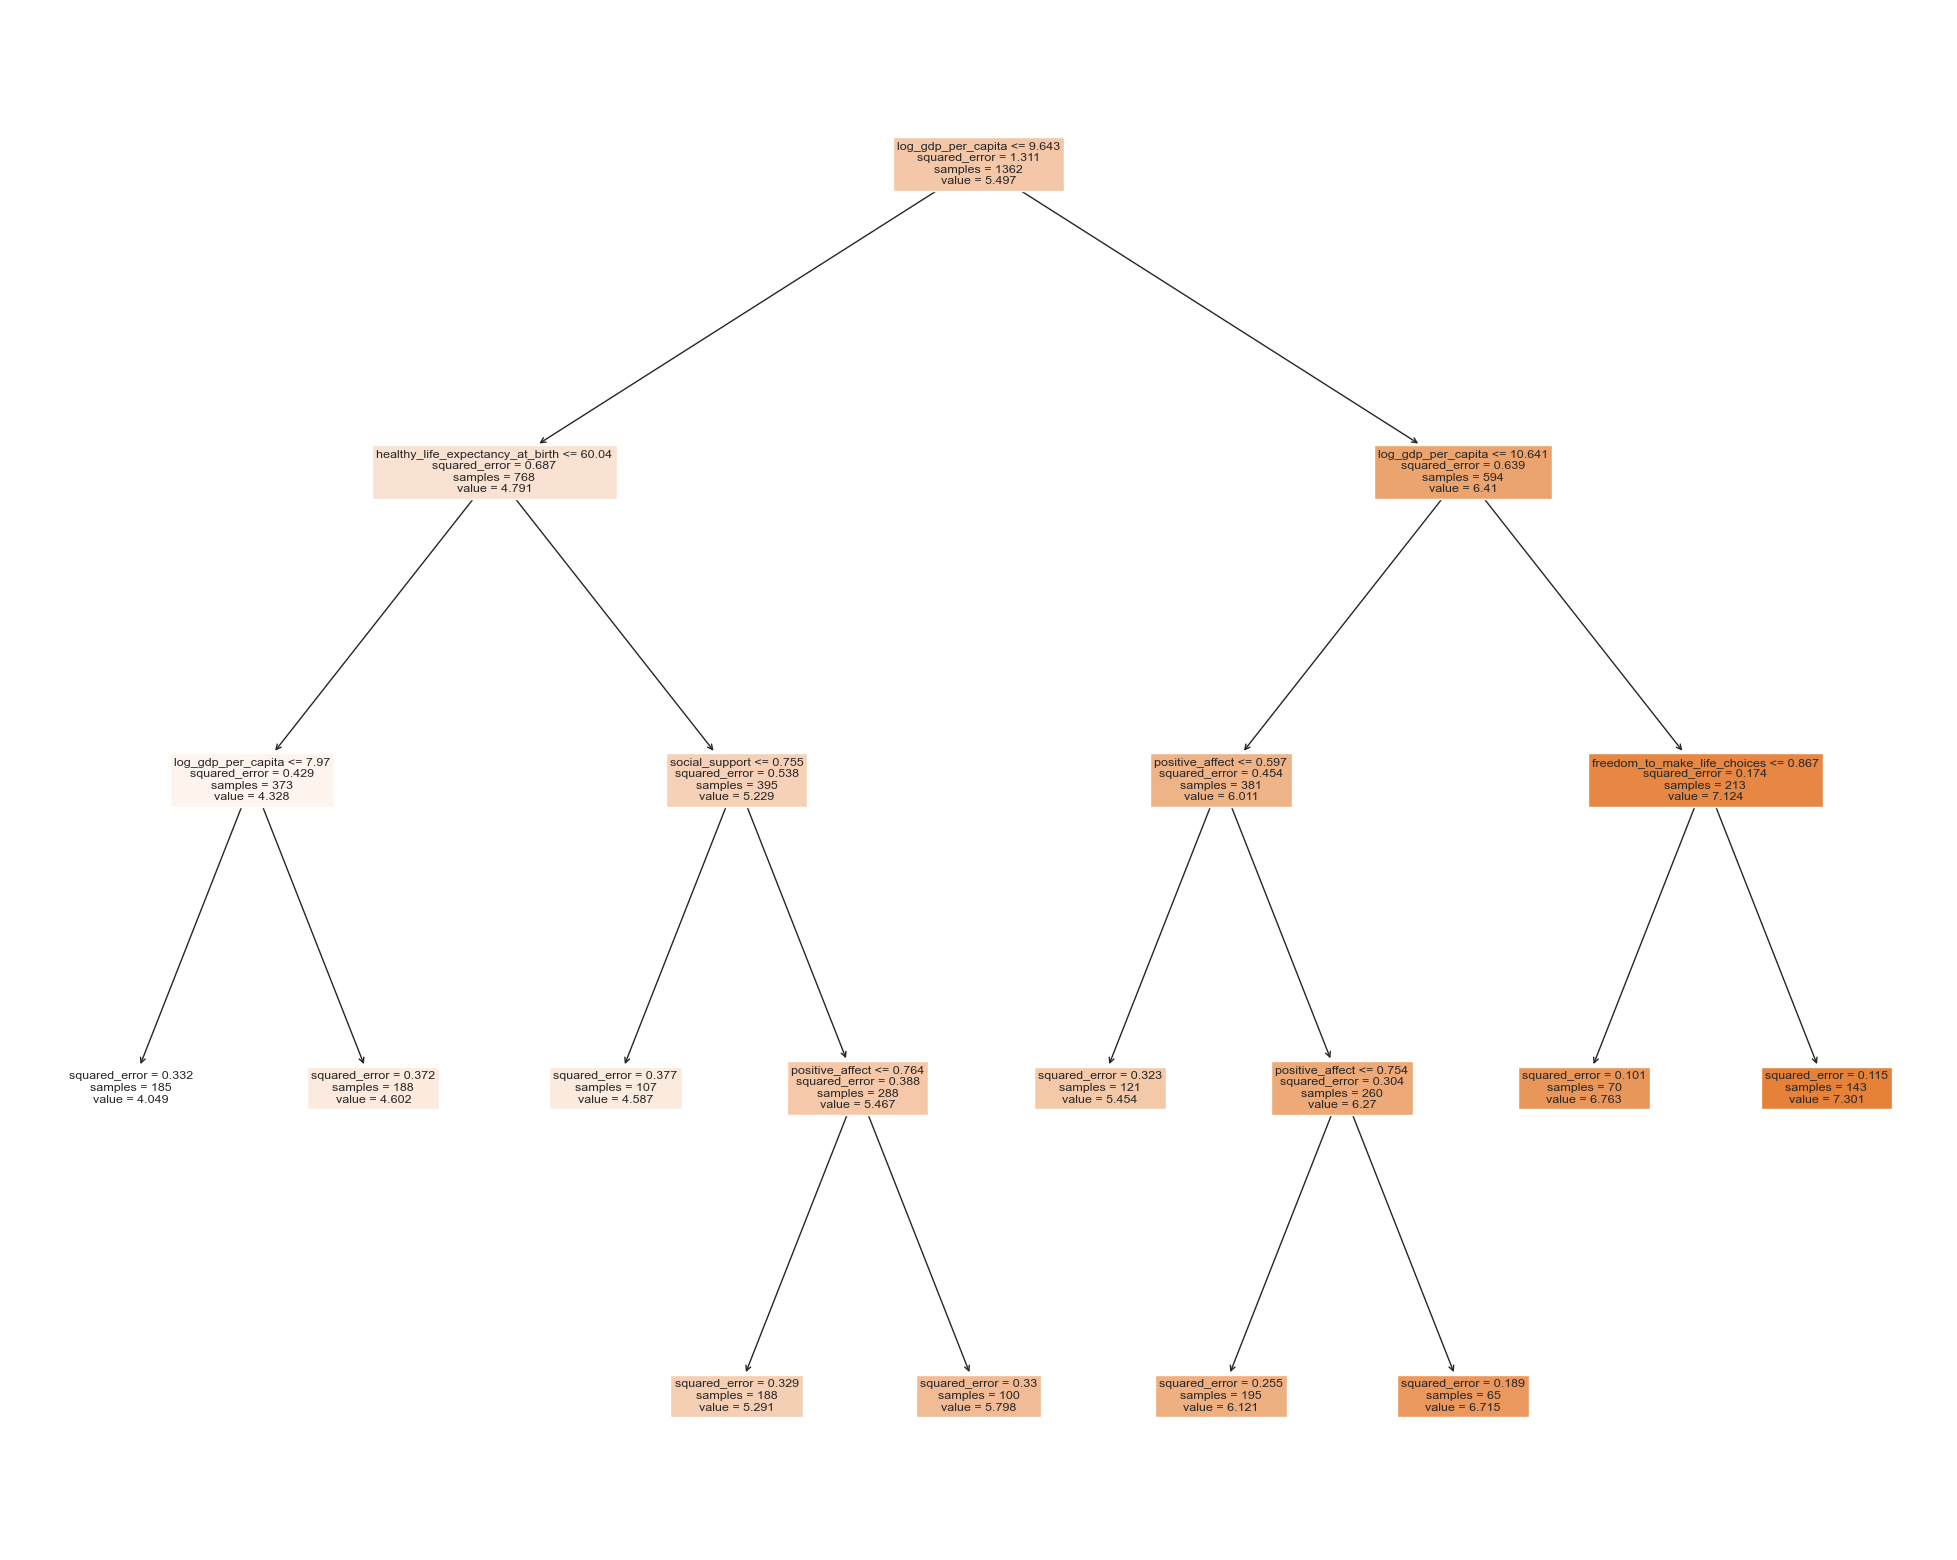

In [174]:
fig = plt.figure(figsize=(25,20))
dtree_plot = plot_tree(dtree, filled=True,
                       feature_names=X_train.columns)

In [175]:
dectree_error_lst = []
for depth in np.arange(4,7,1):
    for leaf in np.arange(12,18,2): 
        dectree = DecisionTreeRegressor(
                            max_depth = depth, 
                            max_leaf_nodes = leaf,
                            splitter = 'best')
        dectree.fit(X_train, y_train)
        y_pred_dec_test = dectree.predict(X_test)
        y_pred_dec_train = dectree.predict(X_train)
        rmse_test = mean_squared_error(y_test, y_pred_dec_test, squared=False).round(3)
        r2_test = adjusted_r2(y_test, y_pred_dec_test, X_test).round(3)
        rmse_train = mean_squared_error(y_train, y_pred_dec_train, squared=False).round(3)
        r2_train = adjusted_r2(y_train, y_pred_dec_train, X_train).round(3)
        
        mae_test = mean_absolute_error(y_test, y_pred_dec_test).round(3)
        mape_test = mean_absolute_percentage_error(y_test, y_pred_dec_test).round(3)
        mae_train = mean_absolute_error(y_train, y_pred_dec_train).round(3)
        mape_train = mean_absolute_percentage_error(y_train, y_pred_dec_train).round(3)
        
        delta_rmse = abs(rmse_train - rmse_test)
        delta_r2 = abs(r2_train - r2_test)
        delta_mae = abs(mae_train - mae_test)

        model_descrip = model_name + '_dectree_dep_' + str(depth) + '_max_leaf_' + str(leaf)
        dectree_error_lst.append({'model_name': model_descrip, 
                      'train_rmse': rmse_train, 
                      'train_r2':r2_train, 
                      'train_mae': mae_train, 
                      'train_mape':mape_train,
                      'test_rmse': rmse_test, 
                      'test_r2':r2_test,
                      'test_mae': mae_test, 
                      'test_mape':mape_test,
                      'delta_RMSE':delta_rmse,
                      'delta_MAE':delta_mae,
                      'delta_R2':delta_r2})
        

dectree_error_df = pd.DataFrame(dectree_error_lst)
dectree_error_df.sort_values(by = ['delta_MAE', 'test_mae'] , ascending=[True, True])
#dectree_error_df.sort_values(by = ['test_r2', 'delta_R2'], ascending=[False, True])

,model_name,train_rmse,train_r2,train_mae,train_mape,test_rmse,test_r2,test_mae,test_mape,delta_RMSE,delta_MAE,delta_R2
0,model_31_dectree_dep_4_max_leaf_12,0.520,0.793,0.401,0.080,0.535,0.771,0.413,0.081,0.015,0.012,0.022
3,model_31_dectree_dep_5_max_leaf_12,0.520,0.793,0.401,0.080,0.535,0.771,0.413,0.081,0.015,0.012,0.022
6,model_31_dectree_dep_6_max_leaf_12,0.520,0.793,0.401,0.080,0.535,0.771,0.413,0.081,0.015,0.012,0.022
2,model_31_dectree_dep_4_max_leaf_16,0.502,0.807,0.389,0.078,0.518,0.785,0.405,0.079,0.016,0.016,0.022
1,model_31_dectree_dep_4_max_leaf_14,0.506,0.804,0.394,0.078,0.528,0.777,0.412,0.080,0.022,0.018,0.027
4,model_31_dectree_dep_5_max_leaf_14,0.506,0.804,0.394,0.078,0.528,0.777,0.412,0.080,0.022,0.018,0.027
7,model_31_dectree_dep_6_max_leaf_14,0.506,0.804,0.394,0.078,0.528,0.777,0.412,0.080,0.022,0.018,0.027
5,model_31_dectree_dep_5_max_leaf_16,0.494,0.813,0.385,0.077,0.522,0.782,0.406,0.079,0.028,0.021,0.031
8,model_31_dectree_dep_6_max_leaf_16,0.494,0.813,0.385,0.077,0.522,0.782,0.406,0.079,0.028,0.021,0.031


/var/folders/xp/szpgjcc16693xmv1q4_gmwgr0000gn/T/ipykernel_41398/2885455363.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  g.set_xticklabels(g.get_xticklabels(), rotation=90)


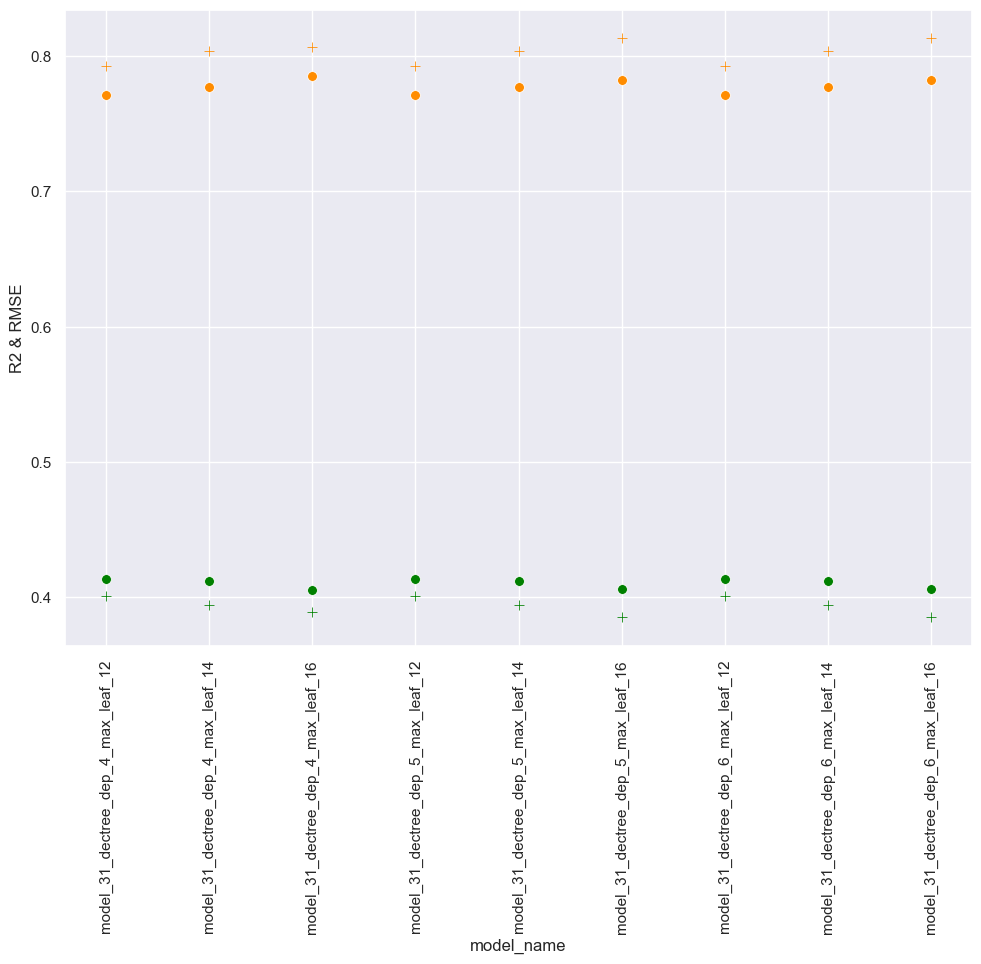

In [176]:
g=sns.scatterplot(data = dectree_error_df, x = 'model_name', y = 'test_r2', color = 'darkorange', s = 50)
g=sns.scatterplot(data = dectree_error_df, x = 'model_name', y = 'test_mae', color = 'green', s = 50)
g=sns.scatterplot(data = dectree_error_df, x = 'model_name', y = 'train_r2', marker='+', color = 'darkorange', s = 50)
g=sns.scatterplot(data = dectree_error_df, x = 'model_name', y = 'train_mae', marker='+', color = 'green', s = 50)
g.set_xticklabels(g.get_xticklabels(), rotation=90)
g.set(ylabel='R2 & RMSE')
plt.show();

In [177]:
#part_dec_tree = dectree_error_df.sort_values(by = ['test_r2', 'delta_R2'], ascending=[False, True]).iloc[:6]
part_dec_tree = dectree_error_df.sort_values(by = ['delta_MAE', 'test_mae'] , ascending=[True, True]).iloc[:6]
part_dec_tree

,model_name,train_rmse,train_r2,train_mae,train_mape,test_rmse,test_r2,test_mae,test_mape,delta_RMSE,delta_MAE,delta_R2
0,model_31_dectree_dep_4_max_leaf_12,0.520,0.793,0.401,0.080,0.535,0.771,0.413,0.081,0.015,0.012,0.022
3,model_31_dectree_dep_5_max_leaf_12,0.520,0.793,0.401,0.080,0.535,0.771,0.413,0.081,0.015,0.012,0.022
6,model_31_dectree_dep_6_max_leaf_12,0.520,0.793,0.401,0.080,0.535,0.771,0.413,0.081,0.015,0.012,0.022
2,model_31_dectree_dep_4_max_leaf_16,0.502,0.807,0.389,0.078,0.518,0.785,0.405,0.079,0.016,0.016,0.022
1,model_31_dectree_dep_4_max_leaf_14,0.506,0.804,0.394,0.078,0.528,0.777,0.412,0.080,0.022,0.018,0.027
4,model_31_dectree_dep_5_max_leaf_14,0.506,0.804,0.394,0.078,0.528,0.777,0.412,0.080,0.022,0.018,0.027


### Random Forest

In [178]:
randforest = RandomForestRegressor(n_estimators=100, 
                                random_state=123, 
                                max_depth = 5,
                                max_leaf_nodes = 15,
                                max_features = 'sqrt',
                                n_jobs=-1, verbose = 1)
randforest.fit(X_train, y_train)

n_nodes = []
maximum_depths = []

# Stats about the trees in random forest
for tree_idx in randforest.estimators_:
    n_nodes.append(tree_idx.tree_.node_count)
    maximum_depths.append(tree_idx.tree_.max_depth)

y_pred_randforest_test = randforest.predict(X_test)
y_pred_randforest_train = randforest.predict(X_train)
rmse_test = mean_squared_error(y_test, y_pred_randforest_test, squared=False).round(3)
r2_test = adjusted_r2(y_test, y_pred_randforest_test, X_test).round(3)
rmse_train = mean_squared_error(y_train, y_pred_randforest_train, squared=False).round(3)
r2_train = adjusted_r2(y_train, y_pred_randforest_train, X_train).round(3)

mae_test = mean_absolute_error(y_test, y_pred_randforest_test).round(3)
mape_test = mean_absolute_percentage_error(y_test, y_pred_randforest_test).round(3)
mae_train = mean_absolute_error(y_train, y_pred_randforest_train).round(3)
mape_train = mean_absolute_percentage_error(y_train, y_pred_randforest_train).round(3)

print(f'Min number of nodes: {int(np.min(n_nodes))}')
print(f'Average number of nodes: {int(np.mean(n_nodes))}')
print(f'Max number of nodes: {int(np.max(n_nodes))}')
print(f'Min maximum depth: {int(np.min(maximum_depths))}')
print(f'Average maximum depth: {int(np.mean(maximum_depths))}')
print(f'Max maximum depth: {int(np.max(maximum_depths))}')
print(f'Number of Trees: {len(randforest.estimators_)}')
print('train_rmse ', rmse_train) 
print('train_r2 ', r2_train)
print('train_mae ', mae_train) 
print('train_mape ', mape_train)
print('test_rmse ', rmse_test)
print('test_r2 ',r2_test)
print('test_mae ', mae_test)
print('test_mape ',mape_test)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.0s


Min number of nodes: 29
Average number of nodes: 29
Max number of nodes: 29
Min maximum depth: 5
Average maximum depth: 5
Max maximum depth: 5
Number of Trees: 100
train_rmse  0.473
train_r2  0.829
train_mae  0.363
train_mape  0.074
test_rmse  0.481
test_r2  0.814
test_mae  0.372
test_mape  0.074


[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished


In [179]:
randforest.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': 5,
 'max_features': 'sqrt',
 'max_leaf_nodes': 15,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': -1,
 'oob_score': False,
 'random_state': 123,
 'verbose': 1,
 'warm_start': False}

In [180]:
random_trees_error_lst = []
for tree_depth in np.arange(5,8,1):
    for tree_leaf in np.arange(15,31,5): 
        random_forest = RandomForestRegressor(n_estimators=100, 
                                random_state=123, 
                                max_depth = tree_depth,
                                max_leaf_nodes = tree_leaf,
                                max_features = 'sqrt',
                                n_jobs=-1, verbose = 1)
        random_forest.fit(X_train, y_train)
        
        y_pred_random_forest_test = random_forest.predict(X_test)
        y_pred_random_forest_train = random_forest.predict(X_train)
        rmse_test = mean_squared_error(y_test, y_pred_random_forest_test, squared=False).round(3)
        r2_test = adjusted_r2(y_test, y_pred_random_forest_test, X_test).round(3)
        rmse_train = mean_squared_error(y_train, y_pred_random_forest_train, squared=False).round(3)
        r2_train = adjusted_r2(y_train, y_pred_random_forest_train, X_train).round(3)
        
        mae_test = mean_absolute_error(y_test, y_pred_random_forest_test).round(3)
        mape_test = mean_absolute_percentage_error(y_test, y_pred_random_forest_test).round(3)
        mae_train = mean_absolute_error(y_train, y_pred_random_forest_train).round(3)
        mape_train = mean_absolute_percentage_error(y_train, y_pred_random_forest_train).round(3)
        
        n_nodes = []
        maximum_depths = []

        for tree_idx in random_forest.estimators_:
            n_nodes.append(tree_idx.tree_.node_count)
            maximum_depths.append(tree_idx.tree_.max_depth)
        
        mean_node_num = int(np.mean(n_nodes))
        mean_depth = int(np.mean(maximum_depths))
        num_of_trees = len(random_forest.estimators_)

        delta_rmse = abs(rmse_train - rmse_test)
        delta_r2 = abs(r2_train - r2_test)
        delta_mae = abs(mae_train - mae_test)

        model_descrip = model_name + '_forest_tree_depth' + str(tree_depth) + '_max_leaf_' + str(tree_leaf)
        random_trees_error_lst.append({'model_name': model_descrip, 
                      'train_rmse': rmse_train, 
                      'train_r2':r2_train, 
                      'train_mae': mae_train, 
                      'train_mape':mape_train,
                      'test_rmse': rmse_test, 
                      'test_r2':r2_test,
                      'test_mae': mae_test, 
                      'test_mape':mape_test,
                      'delta_RMSE':delta_rmse,
                      'delta_MAE':delta_mae,
                      'delta_R2':delta_r2,
                      'mean_node_num': mean_node_num,
                      'mean_depth': mean_depth,
                      'num_of_trees': num_of_trees}) 
        

random_trees_error_df = pd.DataFrame(random_trees_error_lst)
random_trees_error_df.sort_values(by = ['delta_MAE', 'test_mae'], ascending=[True, False])
#random_trees_error_df.sort_values(by = ['test_r2', 'delta_R2'], ascending=[False, True])

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel

,model_name,train_rmse,train_r2,train_mae,train_mape,test_rmse,test_r2,test_mae,test_mape,delta_RMSE,delta_MAE,delta_R2,mean_node_num,mean_depth,num_of_trees
4,model_31_forest_tree_depth6_max_leaf_15,0.472,0.830,0.363,0.074,0.480,0.815,0.371,0.074,0.008,0.008,0.015,29,5,100
0,model_31_forest_tree_depth5_max_leaf_15,0.473,0.829,0.363,0.074,0.481,0.814,0.372,0.074,0.008,0.009,0.015,29,5,100
8,model_31_forest_tree_depth7_max_leaf_15,0.471,0.830,0.363,0.073,0.481,0.815,0.372,0.074,0.010,0.009,0.015,29,5,100
1,model_31_forest_tree_depth5_max_leaf_20,0.454,0.842,0.349,0.071,0.469,0.824,0.364,0.072,0.015,0.015,0.018,39,5,100
5,model_31_forest_tree_depth6_max_leaf_20,0.450,0.845,0.347,0.070,0.465,0.827,0.362,0.072,0.015,0.015,0.018,39,5,100
9,model_31_forest_tree_depth7_max_leaf_20,0.448,0.846,0.346,0.070,0.464,0.827,0.362,0.072,0.016,0.016,0.019,39,6,100
2,model_31_forest_tree_depth5_max_leaf_25,0.443,0.849,0.339,0.069,0.462,0.829,0.358,0.071,0.019,0.019,0.020,49,5,100
3,model_31_forest_tree_depth5_max_leaf_30,0.437,0.854,0.334,0.068,0.459,0.831,0.355,0.071,0.022,0.021,0.023,59,5,100
6,model_31_forest_tree_depth6_max_leaf_25,0.432,0.857,0.333,0.067,0.454,0.835,0.354,0.070,0.022,0.021,0.022,49,6,100
10,model_31_forest_tree_depth7_max_leaf_25,0.430,0.858,0.333,0.067,0.454,0.835,0.354,0.070,0.024,0.021,0.023,49,6,100


/var/folders/xp/szpgjcc16693xmv1q4_gmwgr0000gn/T/ipykernel_41398/4267177350.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  g.set_xticklabels(g.get_xticklabels(), rotation=90)


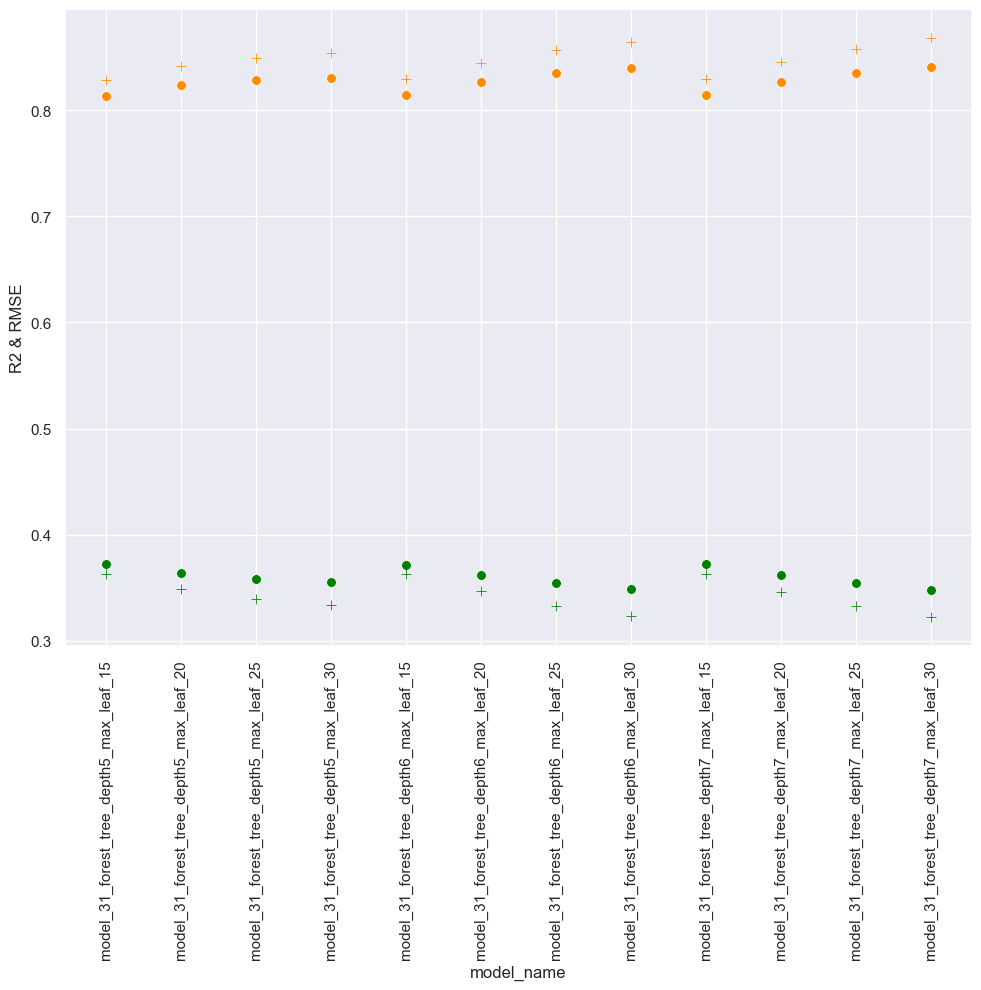

In [181]:
g=sns.scatterplot(data = random_trees_error_df, x = 'model_name', y = 'test_r2', color = 'darkorange', s = 50)
g=sns.scatterplot(data = random_trees_error_df, x = 'model_name', y = 'test_mae', color = 'green', s = 50)
g=sns.scatterplot(data = random_trees_error_df, x = 'model_name', y = 'train_r2', marker='+', color = 'darkorange', s = 50)
g=sns.scatterplot(data = random_trees_error_df, x = 'model_name', y = 'train_mae', marker='+', color = 'green', s = 50)
g.set_xticklabels(g.get_xticklabels(), rotation=90)
g.set(ylabel='R2 & RMSE')
plt.show();

In [182]:
#part_forest = random_trees_error_df.sort_values(by = ['test_r2', 'delta_R2'], ascending=[False, True]).iloc[:4]
part_forest = random_trees_error_df.sort_values(by = ['delta_MAE', 'test_r2'], ascending=[True, False]).iloc[:4]
part_forest

,model_name,train_rmse,train_r2,train_mae,train_mape,test_rmse,test_r2,test_mae,test_mape,delta_RMSE,delta_MAE,delta_R2,mean_node_num,mean_depth,num_of_trees
4,model_31_forest_tree_depth6_max_leaf_15,0.472,0.830,0.363,0.074,0.480,0.815,0.371,0.074,0.008,0.008,0.015,29,5,100
8,model_31_forest_tree_depth7_max_leaf_15,0.471,0.830,0.363,0.073,0.481,0.815,0.372,0.074,0.010,0.009,0.015,29,5,100
0,model_31_forest_tree_depth5_max_leaf_15,0.473,0.829,0.363,0.074,0.481,0.814,0.372,0.074,0.008,0.009,0.015,29,5,100
5,model_31_forest_tree_depth6_max_leaf_20,0.450,0.845,0.347,0.070,0.465,0.827,0.362,0.072,0.015,0.015,0.018,39,5,100


In [183]:
# Concatenate the optimal models of each algorithm to one big error_df:
error_df = pd.concat([part_lin_reg, 
                      part_knn,
                      part_dec_tree,
                      part_forest],
                      #ada_boost_error,
                      #gbr_boost_error],  
                      axis = 0)
                      
error_df.sort_values(by = ['delta_MAE', 'test_mae'], ascending=[True, True])

,model_name,train_rmse,train_r2,train_mae,train_mape,test_rmse,test_r2,test_mae,test_mape,delta_RMSE,delta_MAE,delta_R2,mean_node_num,mean_depth,num_of_trees
3,model_31_knn_manhattan_18,0.444,0.849,0.339,0.069,0.436,0.848,0.341,0.068,0.008,0.002,0.001,NaN,NaN,NaN
4,model_31_knn_euclidean_18,0.455,0.841,0.347,0.071,0.451,0.837,0.351,0.070,0.004,0.004,0.004,NaN,NaN,NaN
6,model_31_knn_manhattan_23,0.464,0.835,0.355,0.072,0.448,0.839,0.349,0.070,0.016,0.006,0.004,NaN,NaN,NaN
1,model_31_lin_reg_2,0.498,0.810,0.386,0.077,0.481,0.815,0.379,0.074,0.017,0.007,0.005,NaN,NaN,NaN
4,model_31_forest_tree_depth6_max_leaf_15,0.472,0.830,0.363,0.074,0.480,0.815,0.371,0.074,0.008,0.008,0.015,29.0,5.0,100.0
8,model_31_forest_tree_depth7_max_leaf_15,0.471,0.830,0.363,0.073,0.481,0.815,0.372,0.074,0.010,0.009,0.015,29.0,5.0,100.0
0,model_31_forest_tree_depth5_max_leaf_15,0.473,0.829,0.363,0.074,0.481,0.814,0.372,0.074,0.008,0.009,0.015,29.0,5.0,100.0
0,model_31_dectree_dep_4_max_leaf_12,0.520,0.793,0.401,0.080,0.535,0.771,0.413,0.081,0.015,0.012,0.022,NaN,NaN,NaN
3,model_31_dectree_dep_5_max_leaf_12,0.520,0.793,0.401,0.080,0.535,0.771,0.413,0.081,0.015,0.012,0.022,NaN,NaN,NaN
6,model_31_dectree_dep_6_max_leaf_12,0.520,0.793,0.401,0.080,0.535,0.771,0.413,0.081,0.015,0.012,0.022,NaN,NaN,NaN


/var/folders/xp/szpgjcc16693xmv1q4_gmwgr0000gn/T/ipykernel_41398/4059825178.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  g.set_xticklabels(g.get_xticklabels(), rotation=90)


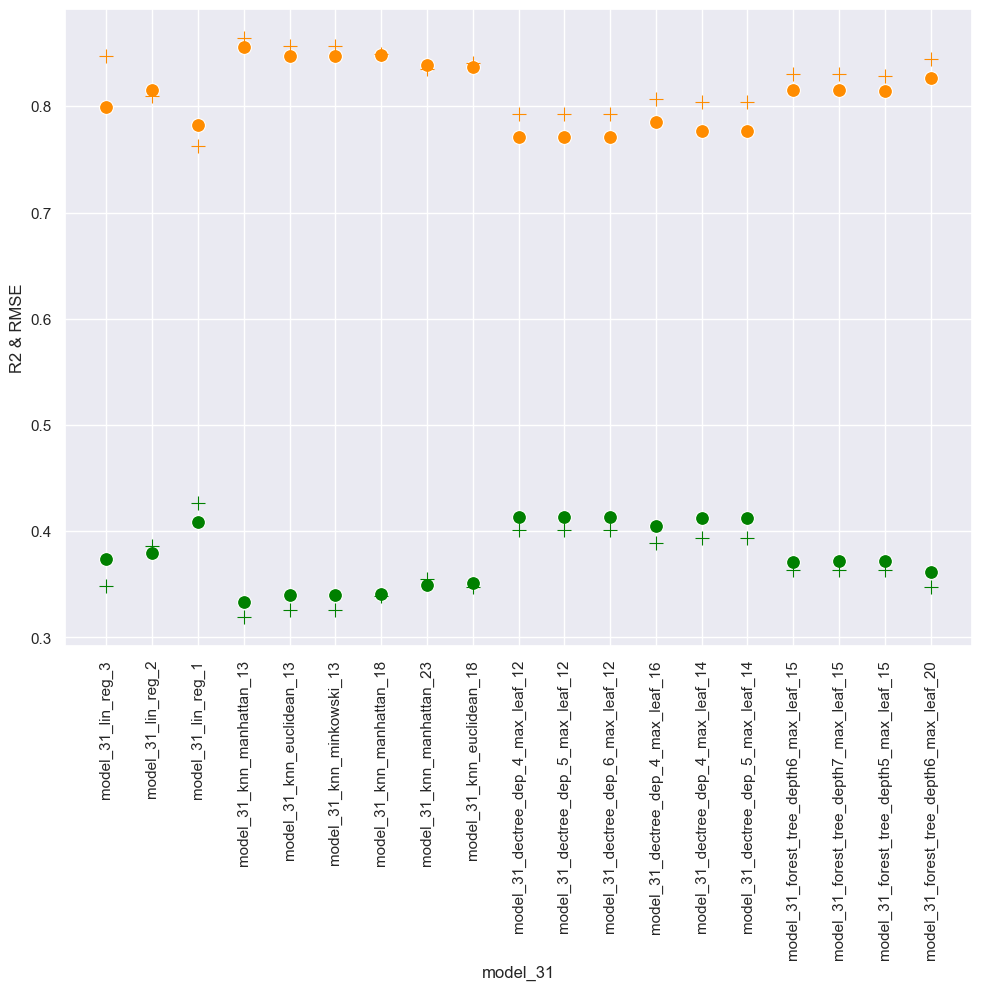

In [184]:
g=sns.set_theme(rc={'figure.figsize':(11.7,8.27)})
g=sns.scatterplot(data = error_df, x = 'model_name', y = 'test_r2', color = 'darkorange', s=100)
g=sns.scatterplot(data = error_df, x = 'model_name', y = 'test_mae', color = 'green', s=100)
g=sns.scatterplot(data = error_df, x = 'model_name', y = 'train_r2', marker='+', color = 'darkorange', s=100)
g=sns.scatterplot(data = error_df, x = 'model_name', y = 'train_mae', marker='+', color = 'green', s=100)
g.set_xticklabels(g.get_xticklabels(), rotation=90)
g.set(ylabel='R2 & RMSE')
g.set(xlabel=model_name)
plt.show();